In [2]:
import sys 
sys.path.append('../')

from config_.paths import * 

from helper.coco import *
from helper.annotations import bboxArea,cropMask,decodeMasks
from helper.tuning import readJson,imreadRGB,writeJson,sortedUnique
from helper.paths import getImagePath,getId,initPath,collectPaths
from helper.lib_SA import visualizeSA
from helper.lib_detectron2 import registerCatalog,getCatalog,visualizeD2
from helper.common_libraries import join,shutil,exists,listdir

# Formatting GT and visualization

## WasteRealSingle1: WRS0001

In [3]:
channel = 'WRS0001'
path_dir_images = join(path_root_images_from_src,channel)

In [4]:
# path to original GT json file
path_file_original_GT = '/home/dkhatanassia/PDM/00_Deliverable/datasets/jerry_real123/te_GT_jerry_real.json'

# path to channel GT
path_dir_channel_GT = initPath(join(path_root_GT,channel))
path_file_channel_GT = join(path_dir_channel_GT,f'{channel}_coco_annotations.json')

formatting_requested = False
if not exists(path_file_channel_GT): 
    # channel dict (contains the map between original name and timestamp format name)
    path_channel_dict = join(path_root_images_from_src,f'{channel}.json')
    channel_dict = readJson(path_channel_dict)
    names = channel_dict['file_name']
    
    shutil.copy(path_file_original_GT,path_file_channel_GT)
    formatting_requested = True
    
channel_GT = readJson(path_file_channel_GT)

In [8]:
if formatting_requested:
    #*********************************************************************************************************************
    # we need to change the image names
    for item in channel_GT['images']:
        item['file_name'] = names[item['file_name']]
    
    # save updates
    writeJson(path_file_channel_GT,channel_GT)
    formatting_requested = False

In [9]:
# we can now register the catalog
registerCatalog(channel,path_file_channel_GT,path_dir_images)
catalog = getCatalog(channel)

registered: WRS0001
json is located at: /home/dkhatanassia/PDM/00_Deliverable/GT/WRS0001/WRS0001_coco_annotations.json
images are located at: /home/dkhatanassia/PDM/00_Deliverable/00_images_from_src/WRS0001



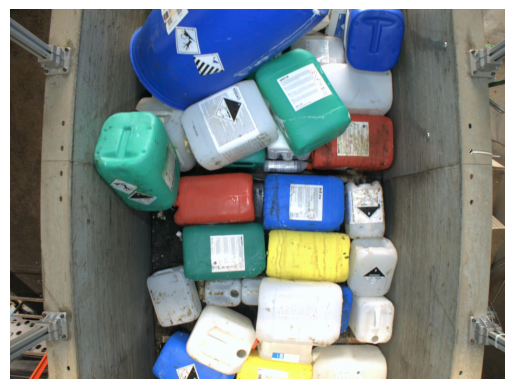

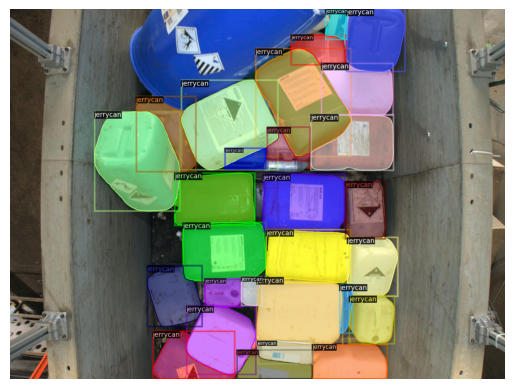

In [10]:
available_ids = [item['id'] for item in channel_GT['images']]

k_th = 5
image_id = available_ids[k_th]

image_name = [item['file_name'] for item in channel_GT['images'] if item['id']==image_id][0]
image = imreadRGB(getImagePath(getId(image_name)))
visualizeSA(image)
visualizeD2(k_th,channel)

## WasteSyntheticMultiple1: WSM0001

In [11]:
channel = 'WSM0001'
path_dir_images = join(path_root_images_from_src,channel)

In [12]:
# path to original GT json file
path_file_original_GT = '/home/dkhatanassia/drives/arc/datasets/synthetic/2022_innorecycling_objects/all_objects_with_distractions/coco_annotations.json'

# path to channel GT
path_dir_channel_GT = initPath(join(path_root_GT,channel))
path_file_channel_GT = join(path_dir_channel_GT,f'{channel}_coco_annotations.json')

formatting_requested = False
if not exists(path_file_channel_GT): 
    # channel dict (contains the map between original name and timestamp format name)
    path_channel_dict = join(path_root_images_from_src,f'{channel}.json')
    channel_dict = readJson(path_channel_dict)
    names = channel_dict['file_name']
    
    shutil.copy(path_file_original_GT,path_file_channel_GT)
    formatting_requested = True
    
channel_GT = readJson(path_file_channel_GT)

In [13]:
if formatting_requested:
    #*********************************************************************************************************************
    # we need to change the image names
    for item in channel_GT['images']:
        item['file_name'] = names[item['file_name']]
        
    #*********************************************************************************************************************
    # we need to add a name to the categories
    cat2name = {
        '90001':'combined plant pots',
        '90002':'plastic basket',
        '90003':'plastic coat hanger 1',
        '90004':'combined mini plant pots',
        '90005':'large bucket',
        '90006':'plant pot 1',
        '90007':'plant pot 2',
        '90008':'plant pot 3',
        '90009':'plant pot 4',
        '90010':'hanger 1',
        '90011':'hanger 2',
        '90012':'hanger 3',
        '90013':'jug suma rapid',
        '90014':'plant pot 5',
        '90015':'plastic container 1',
        '90016':'plastic container 2',
        '90017':'black tube large',
        '90018':'jug wetrok polex',
        '90019':'jug halades alco',
        '90020':'hanger 4',
        '90021':'hanger 5',
        '90022':'tube long',
        '90023':'tube medium',
        '90024':'tube short',
        '90025':'tube knot'}
    
    for item in channel_GT['categories']:
        item['name'] = cat2name[item['name']]
        
    #*********************************************************************************************************************
    # we need to add a name to the supercategories
    cat2supercat = {
        '90001'	:	'multi plant pot'	,
        '90002'	:	'basket'	,
        '90003'	:	'hanger'	,
        '90004'	:	'multi plant pot'	,
        '90005'	:	'bucket'	,
        '90006'	:	'plant pot'	,
        '90007'	:	'plant pot'	,
        '90008'	:	'plant pot'	,
        '90009'	:	'plant pot'	,
        '90010'	:	'hanger'	,
        '90011'	:	'hanger'	,
        '90012'	:	'hanger'	,
        '90013'	:	'jug'	,
        '90014'	:	'plant pot'	,
        '90015'	:	'plastic container'	,
        '90016'	:	'plastic container'	,
        '90017'	:	'pipe'	,
        '90018'	:	'jug'	,
        '90019'	:	'jug'	,
        '90020'	:	'hanger'	,
        '90021'	:	'hanger'	,
        '90022'	:	'tube'	,
        '90023'	:	'tube'	,
        '90024'	:	'tube'	,
        '90025'	:	'tube'}
    
    for item in channel_GT['categories']:
        item['supercategory'] = cat2supercat[item['supercategory']]
        
        
    #*********************************************************************************************************************
    
    # merge similar categories (based on innorecycling type)
    categories = channel_GT['categories'].copy()
    
    # the names are replaced by the supercategories 
    cat2supercat = {item['name']:item['supercategory'] for item in categories}
    
    # we need new ids to describe the supercategories 
    set_of_supercategories = set([item['supercategory'] for item in categories])
    supercat2new_id = {item:k for k,item in enumerate(set_of_supercategories)}
    
    # we need to replace the old_ids
    old_id2new_id = {item['id']:supercat2new_id[item['supercategory']] for item in categories}
    
    # create new category dict
    new_categories = [
        {'supercategory':str(supercat2new_id[item]), 'id':supercat2new_id[item], 'name':item}
        for item in supercat2new_id
    ]
    
    for ann in channel_GT['annotations']:
        ann['category_id'] = old_id2new_id[ann['category_id']]
        
    channel_GT['categories'] = new_categories
    
    #*********************************************************************************************************************
    
    # we need to convert polygon format to RLE encoded binary masks:
    channel_GT = masksFromPolygons(channel_GT)
    
    #*********************************************************************************************************************
    
    # save updates
    writeJson(path_file_channel_GT,channel_GT)
    formatting_requested = False

In [14]:
# we can now register the catalog
registerCatalog(channel,path_file_channel_GT,path_dir_images)
catalog = getCatalog(channel)

registered: WSM0001
json is located at: /home/dkhatanassia/PDM/00_Deliverable/GT/WSM0001/WSM0001_coco_annotations.json
images are located at: /home/dkhatanassia/PDM/00_Deliverable/00_images_from_src/WSM0001




Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



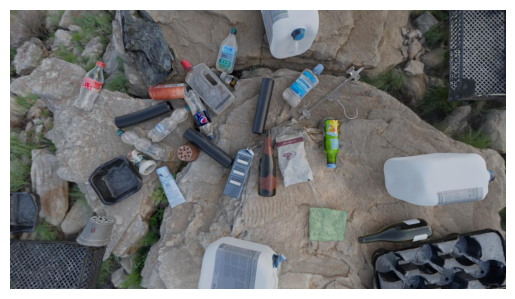


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



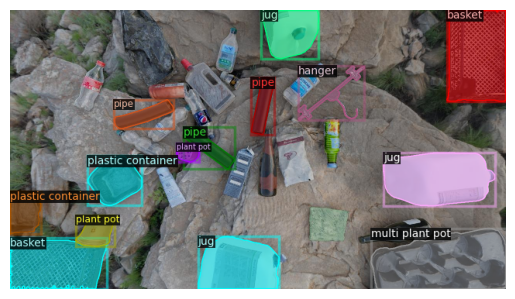

In [15]:
image_id = 1007

image_name = [item['file_name'] for item in channel_GT['images'] if item['id']==image_id][0]
image = imreadRGB(getImagePath(getId(image_name)))
visualizeSA(image)
visualizeD2(image_id,channel)

## AnyRealMultiple 2: ARM0002

In [20]:
channel = 'ARM0002'
path_dir_images = join(path_root_images_from_src,channel)

# path to original GT json file
path_original_GT = '/home/dkhatanassia/PDM/00_Deliverable/datasets/COCO/instances_val2017.json'

# path to channel GT
path_dir_channel_GT = initPath(join(path_root_GT,channel))
path_channel_GT = join(path_root_GT,channel,f'{channel}_coco_annotations.json')

formatting_requested = False
if not exists(path_channel_GT): 
    # channel dict (contains the map between original name and timestamp format name)
    path_channel_dict = join(path_root_images_from_src,f'{channel}.json')
    channel_dict = readJson(path_channel_dict)
    names = channel_dict['file_name']
    
    shutil.copy(path_original_GT,path_channel_GT)
    formatting_requested = True
    
channel_GT = readJson(path_channel_GT)
img_id_dict = {item['id']:getId(item['file_name']) for item in channel_GT['images']}

In [21]:
if formatting_requested:
    #*********************************************************************************************************************
    # filter out the images which are not available
    channel_GT['images'] = [item for item in channel_GT['images'] if item['file_name'] in names.keys()]
    
    # filter out annotations else than polygon
    channel_GT['annotations'] = [item for item in channel_GT['annotations'] if type(item['segmentation'])==list]
    
    # filter out useless annotations (image not available)
    existing_image_id = [item['id'] for item in channel_GT['images']]
    exists_dict = {item:True for item in existing_image_id}
    channel_GT['annotations'] = [item for item in channel_GT['annotations'] if item['image_id'] in exists_dict.keys()]
    
    # sort images,categories by id
    channel_GT['images'] = sorted(channel_GT['images'], key=lambda item: item['id'])
    channel_GT['categories'] = sorted(channel_GT['categories'], key=lambda item: item['id'])    
    
    # convert polygon format to RLE encoded binary masks:
    channel_GT = masksFromPolygons(channel_GT)
    
    # we need to change the image names
    for item in channel_GT['images']:
        item['file_name'] = names[item['file_name']]
    
    # save updates
    writeJson(path_channel_GT,channel_GT)
    formatting_requested = False

In [23]:
# we can now register the catalog
registerCatalog(channel,path_channel_GT,path_dir_images)
catalog = getCatalog(channel)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



registered: ARM0002
json is located at: /home/dkhatanassia/PDM/00_Deliverable/GT/ARM0002/ARM0002_coco_annotations.json
images are located at: /home/dkhatanassia/PDM/00_Deliverable/00_images_from_src/ARM0002



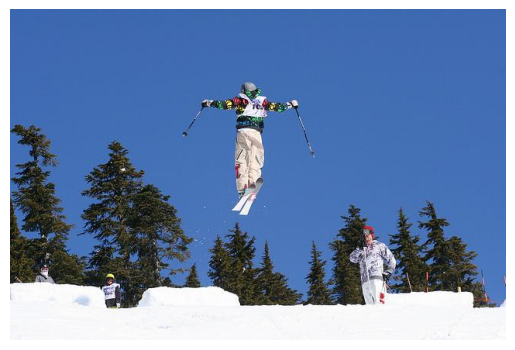


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



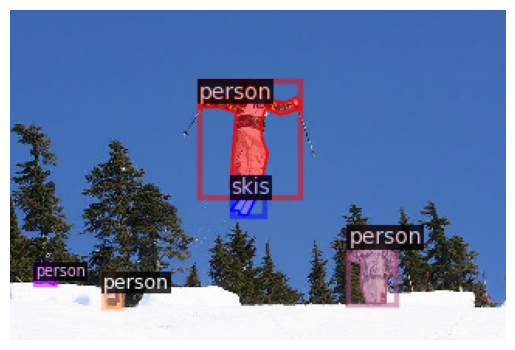

'/home/dkhatanassia/PDM/00_Deliverable/00_images_from_src/ARM0002/2023/03/18/ARM0002_20230318_000029.jpg'

In [24]:
k_th = random.randint(0,len(catalog[0]))
k_th = 29

image_id = [item['id'] for item in channel_GT['images']][k_th]
image_name = [item['file_name'] for item in channel_GT['images'] if item['id']==image_id][0]
image = imreadRGB(getImagePath(getId(image_name)))
visualizeSA(image)
visualizeD2(k_th,channel)

getImagePath(getId(image_name))

In [12]:
catalog[0][4577]

{'file_name': '/home/dkhatanassia/PDM/00_Deliverable/00_images_from_src/ARM0002/2023/03/18/ARM0002_20230318_004577.jpg',
 'height': 464,
 'width': 640,
 'image_id': 530836,
 'annotations': [{'iscrowd': 0,
   'bbox': [341.01, 279.53, 17.77, 35.92],
   'category_id': 39,
   'segmentation': {'size': [464, 640],
    'counts': 'lij4>d=>O2M2O2N1O1000000O10O101O1N3N1G9AQRo3'},
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': [0.0, 206.62, 55.14, 209.11],
   'category_id': 72,
   'segmentation': {'size': [464, 640],
    'counts': 'a6\\6T83M000000000000000000000000000000O10000000000000O10000O100O1000O1O2M2O1O1O2M2O1O101N1O1O101N1O2N3N2M2N3M2O2M3XMg_X8'},
   'bbox_mode': <BoxMode.XYWH_ABS: 1>},
  {'iscrowd': 0,
   'bbox': [574.53, 213.75, 65.47, 181.43],
   'category_id': 72,
   'segmentation': {'size': [464, 640],
    'counts': 'eYT8V1Z=P1PO`0@`0hEYMg7Q3kGSMU8Q3cGTM\\8P3\\GTMd8P3TGUMk8o2mFUMS9T401O001O001O0010O01O1O001O1O001O1O001O1O001O000000000000000001O000000000001O0000000

In [36]:
car:1773
hot_dog:3202
challenging:4577

## CH00004 channel: CH00004

In [25]:
channel = 'CH00004'
path_file_json = join(path_root_GT,channel,f'{channel}_coco_annotations.json')
path_dir_images = join(path_root_images_from_src,channel)

channel_GT = readJson(path_file_json)

In [26]:
registerCatalog(channel,path_file_json,path_dir_images)
catalog = getCatalog(channel)


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



registered: CH00004
json is located at: /home/dkhatanassia/PDM/00_Deliverable/GT/CH00004/CH00004_coco_annotations.json
images are located at: /home/dkhatanassia/PDM/00_Deliverable/00_images_from_src/CH00004



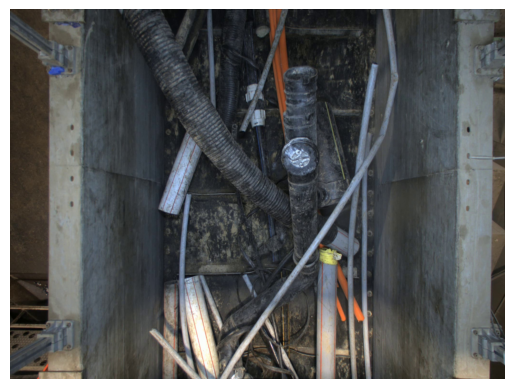


Category ids in annotations are not in [1, #categories]! We'll apply a mapping for you.



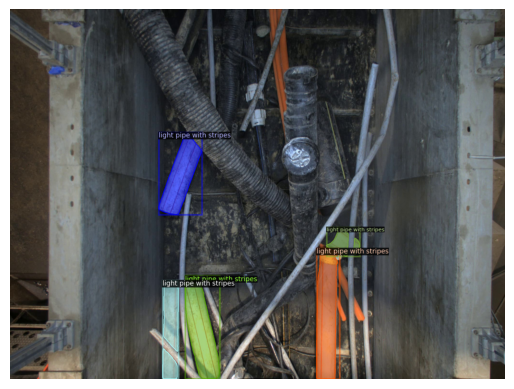

In [27]:
image_id = 63
image_name = [item['file_name'] for item in channel_GT['images'] if item['id']==image_id][0]
image = imreadRGB(getImagePath(getId(image_name)))
visualizeSA(image)
visualizeD2(image_id,channel)

# Get "manually annotated" instances

## AnyRealMultiple: ARM0002

In [9]:
channel = 'ARM0002'
path_dir_images = join(path_root_images_from_src,channel)
path_channel_GT = join(path_root_GT,channel,f'{channel}_coco_annotations.json')
channel_GT = readJson(path_channel_GT)

In [10]:
# get n annotations for each categegory
categories = channel_GT['categories']
n = 20

# create the directory where the manual annotations are stored
path_dir_anns = initPath(join(path_root_manual_annotation,channel,'ann_images'))

if not listdir(path_dir_anns):
    # pick 20 biggest annotations of each categories, which serve as manual annotation
    manually_annotated = []
    for item in categories:
        cat = item['id']
        instances_of_cat = [item for item in channel_GT['annotations'] if item['category_id']==cat]
        instances_of_cat = sorted(instances_of_cat, key=lambda item: bboxArea(item),reverse = True)
        #random.shuffle(instances_of_cat)
        n_instances = instances_of_cat[:n]
        for ann in n_instances: ann['GT_category']=cat
        manually_annotated += instances_of_cat[:n]
    print(len(manually_annotated))
    
    # get the timestamp of the images they come from
    image_ids = sortedUnique([item['image_id'] for item in manually_annotated])
    
    # for each image, create an annotation file
    retrieved = []
    for image_id in image_ids:
        file_name = [getId(item['file_name']) for item in channel_GT['images'] if item['id'] == image_id][0]+'.json'
        related_anns = [ann for ann in manually_annotated if ann['image_id']==image_id]
        if len(related_anns)>0: retrieved.append(related_anns)
        writeJson(join(path_dir_anns,file_name),related_anns)
        
    
    acc = 0
    for path in collectPaths(path_dir_anns):
        tmp = readJson(path)
        acc+=len(tmp)
    print(acc)
    
    # ==> Now we launch the manual annotation tool, which will create the embeddings

1580
1580
